In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [41]:
df = pd.read_excel('spinellisLog.xlsx')

In [42]:
df.columns

Index(['Date', 'Name of Event', 'Event Type', 'Lead', 'Host', 'Staff', 'Tip',
       'Credit Card Tip?', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [43]:
df = df.drop('Unnamed: 8', axis=1)
df = df.drop('Unnamed: 9', axis=1)
df['Host'] = df['Host'].fillna(value='-')
df['Lead'] = df['Lead'].fillna(value='-')

In [44]:
# Percentage of events when tip was 0 or cash
np.mean(df['Credit Card Tip?'] == 'N')

0.7916666666666666

In [45]:
# Total tip amount between August 14, 2022, and November 11, 2022
sum(df['Tip'])

5443.5

In [46]:
#  total cash tips
df[df['Credit Card Tip?'] == 'N']['Tip'].sum()

3277.0

In [47]:
# func to calculate how many times someone was the lead
def numEventsAsLead(staff: str):
    return (df[df['Lead'].str.contains(staff)])['Date'].count()

In [48]:
def meanTipWith(staff):
    averageTip = df.loc[df['Staff'].str.contains(staff) | 
           df['Host'].str.contains(staff) | 
           df['Lead'].str.contains(staff)]['Tip'].mean()
    print(f"{staff}:    \t$", round(averageTip, 2))
    return(averageTip)

In [49]:
#  function to calculate average tip received when someone is the lead
def meanTipWhenLead(lead: str):
    averageTip = (df[df['Lead'].str.contains(lead)])['Tip'].mean()
    print(f"{lead}:    \t$", round(averageTip, 2))
    return(round(averageTip, 2))

In [50]:
# Func to calculate the number of events with a staff
def numEventsWith(staff: str):
    eventCount = df.loc[df['Staff'].str.contains(staff) | 
           df['Host'].str.contains(staff) | 
           df['Lead'].str.contains(staff)]['Name of Event'].count()
    return eventCount

In [51]:
#Finding all unique Leads, and delete "-" from the leads array (of type np.array)
leads = df['Lead'].unique()
leads = np.delete(leads, np.where(leads == '-'))

In [52]:
# Trying to get unique list of all staff
# Make the Staff Series of type list
dfcopy = df.copy()
dfcopy['Staff'] = dfcopy['Staff'].str.split(', ')

In [53]:
dfcopy['Staff']

0                            [Sebastian, Steven]
1     [Brian, Janine, Chrissy, Michele, Cassidy]
2                                [Brian, Hannah]
3                                   [Brian, Sue]
4                               [Brian, Cassidy]
                         ...                    
67                                 [Brian, Beth]
68                              [Brian, Michele]
69                                  [Brian, Sue]
70                      [Brian, Jennie, Chrissy]
71                              [Brian, Chrissy]
Name: Staff, Length: 72, dtype: object

In [54]:
# iterating through 2D array 
# getting 1D list of all staff from every event
staffList = []
for _ in dfcopy['Staff']:
    for i in _:
        staffList.append(i)
        print(i, end=' ')

Sebastian Steven Brian Janine Chrissy Michele Cassidy Brian Hannah Brian Sue Brian Cassidy Brian Brian Cassidy Taylor Julia Michael Brian Cassidy Julia Angel Josh Justin Steven Sebastian Ava Brian Michele Diane Brian Janine Chrissy Jennie Justin Michael Kerri (Josh Monique Taylor Ryleigh Matt Roberto) Brian Diane Brian Michele Brian Jennie Brian Joey Janine Michele  Brian Janine Michael Sebastian Josh Justin Chrissy  Brian Taylor Chrissy Brian Deb Liz  Brian Beth Sue Brian Jack Sue Brian Cassidy Brian Sebastian Josh Justin Taylor Brian Beth Liz Brian Joey Brian Justin Julia Janine Michael Brian Chrissy Deb  Brian Janine Joey Brian Beth Kerri Brian Brian Brian Bryan Brian Kerri Cassidy Bryan Michele Laura Chrissy Janine Diane Brian Bryan Brian Jeanine Chrissy Ryleigh Brian Janine Brian Diane Brian Beth Chrissy Brian Janine Brian Cassidy Chrissy Joey Brian Cassidy Justin Brian Julia Jeanine Chrissy Bryan  Brian Bryan Cassidy Brian Janine Joey Beth Brian Brian Michele Brian Brian Beth Liz

In [55]:
# Cleaning the staff list. making all values unique with set()
staffList[37] = 'Kerri'
staffList[41] = 'Matt Roberto'
staffSet = set(staffList)
staffSet.remove('Staff')
staffSet.remove('Matt Roberto')
staffList = list(staffSet)
staffList

# some names have a space character at the end of them
# This removes the space character
for i in range(len(staffList)):
    staffList[i] = staffList[i].replace(' ',  '')

# Remove repeat staff names
staffSet = set(staffList)
staffList = list(staffSet)


In [56]:
# Get the mean tip for each staff member
# create a corresponding list with the mean tip
staffListMeanTip = []
for staff in staffList:
    staffListMeanTip.append(meanTipWith(staff))

Sebastian:    	$ 19.67
Deb:    	$ 132.25
Liz:    	$ 176.33
Justice:    	$ 0.0
Kerri:    	$ 28.0
Bryan:    	$ 48.33
Ava:    	$ 0.0
Amani:    	$ 0.0
Sue:    	$ 82.67
Taylor:    	$ 12.0
Jake:    	$ 0.0
Chrissy:    	$ 56.77
Hannah:    	$ 100.0
Julia:    	$ 0.0
Melanie:    	$ 0.0
Cassidy:    	$ 62.89
Ryleigh:    	$ 14.0
Brian:    	$ 75.6
Laura:    	$ 32.67
Christian:    	$ 140.0
Michele:    	$ 79.58
Justin:    	$ 37.0
Michael:    	$ 35.2
Joey:    	$ 66.67
Jack:    	$ 205.0
Monique:    	$ 89.0
Steven:    	$ 10.0
Beth:    	$ 76.58
Janine:    	$ 59.22
Angel:    	$ 0.0
Diane:    	$ 64.46
Jess:    	$ 185.0
Jennie:    	$ 43.45
Josh:    	$ 31.5
Jeanine:    	$ 0.0
Gen:    	$ 140.0


## New DataFrame to display  information based on each waiter

In [57]:
# rounding the average tip to 2 decimal places
for i in range(len(staffListMeanTip)):
    staffListMeanTip[i] = round(staffListMeanTip[i],2)

In [58]:
data = {
    'Waiter': staffList,
    'MeanTip': staffListMeanTip
}
df2 = pd.DataFrame(data)

In [59]:
df2.sort_values(by=['Waiter'])

,Waiter,MeanTip
7,Amani,0.00
29,Angel,0.00
6,Ava,0.00
27,Beth,76.58
17,Brian,75.60
5,Bryan,48.33
15,Cassidy,62.89
11,Chrissy,56.77
19,Christian,140.00
1,Deb,132.25


In [60]:
# Create EventsWorked column
df2['EventsWorked'] = 1
# iterate through the Waiter Series and set the EventsWorked column
# this first line ignores the warning of writing to a "slice" of a dataframe
pd.options.mode.chained_assignment = None
for i in range(len(df2['Waiter'])):
    df2['EventsWorked'][i] = numEventsWith(staffList[i])
#reactivate the 'copying to a slice' warning
pd.options.mode.chained_assignment = 'warn'

In [61]:
df2.sort_values(by='EventsWorked', ascending=False)

,Waiter,MeanTip,EventsWorked
17,Brian,75.60,71
11,Chrissy,56.77,20
27,Beth,76.58,19
28,Janine,59.22,18
8,Sue,82.67,18
30,Diane,64.46,12
20,Michele,79.58,12
32,Jennie,43.45,11
15,Cassidy,62.89,9
23,Joey,66.67,9


### I average the highest tips when working with Sue, Michele, Beth, Joey, or Diane

In [62]:
# Remove putliers, where the # of events worked is less than 5
# Sort by highest Mean Tip
df2.loc[(df2['EventsWorked'] >= 5)].sort_values(by='MeanTip', ascending = False).head(6)

,Waiter,MeanTip,EventsWorked
8,Sue,82.67,18
20,Michele,79.58,12
27,Beth,76.58,19
17,Brian,75.60,71
23,Joey,66.67,9
30,Diane,64.46,12


### There seems to be a positive correlation between the number of events worked and the mean tip

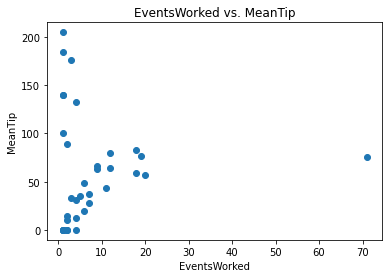

In [63]:
plt.scatter(x=df2['EventsWorked'], y=df2['MeanTip'])
plt.title('EventsWorked vs. MeanTip')
plt.xlabel('EventsWorked')
plt.ylabel('MeanTip')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

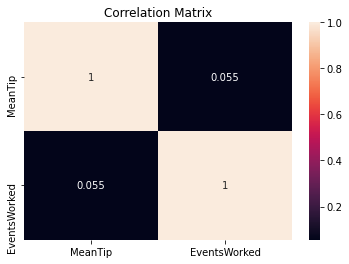

In [64]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

In [65]:
df2RemoveOutliers = df2.loc[(df2['EventsWorked'] >= 5) & (df2['EventsWorked'] < 25)]
df2RemoveOutliers

,Waiter,MeanTip,EventsWorked
0,Sebastian,19.67,6
4,Kerri,28.00,7
5,Bryan,48.33,6
8,Sue,82.67,18
11,Chrissy,56.77,20
15,Cassidy,62.89,9
20,Michele,79.58,12
21,Justin,37.00,7
22,Michael,35.20,5
23,Joey,66.67,9


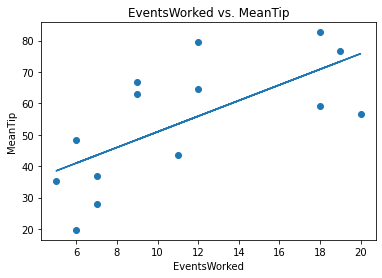

In [66]:
x=df2RemoveOutliers['EventsWorked']
y=df2RemoveOutliers['MeanTip']
plt.scatter(x,y)
plt.title('EventsWorked vs. MeanTip')
plt.xlabel('EventsWorked')
plt.ylabel('MeanTip')
# Add trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
plt.show()

### After removing the outliers(where EventsWorked is less than 5 and more than 25), there is a stronger positive correlation between the Mean Tip and Events Worked compared to the correlation before removing outliers

Text(0.5, 1.0, 'Correlation Matrix')

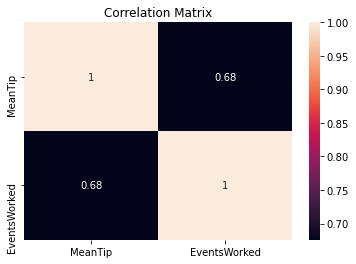

In [67]:
correlation_matrix2 = df2RemoveOutliers.corr()
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix')

In [68]:
def totalTipWith(staff: str):
    total = df[df['Staff'].str.contains(staff) | 
           df['Host'].str.contains(staff) | 
           df['Lead'].str.contains(staff)]['Tip'].sum()
    print(f"{staff}:    \t$", total)
    return(total)

In [69]:
# Create TotalTips column
df2['TotalTips'] = 1
# this first line ignores the warning of writing to a "slice" of a dataframe
pd.options.mode.chained_assignment = None
for i in range(len(df2['Waiter'])):
    df2['TotalTips'][i] = totalTipWith(df2['Waiter'][i])
#reactivate the 'copying to a slice' warning
pd.options.mode.chained_assignment = 'warn'

Sebastian:    	$ 118.0
Deb:    	$ 529.0
Liz:    	$ 529.0
Justice:    	$ 0.0
Kerri:    	$ 196.0
Bryan:    	$ 290.0
Ava:    	$ 0.0
Amani:    	$ 0.0
Sue:    	$ 1488.0
Taylor:    	$ 48.0
Jake:    	$ 0.0
Chrissy:    	$ 1135.5
Hannah:    	$ 100.0
Julia:    	$ 0.0
Melanie:    	$ 0.0
Cassidy:    	$ 566.0
Ryleigh:    	$ 28.0
Brian:    	$ 5443.5
Laura:    	$ 98.0
Christian:    	$ 140.0
Michele:    	$ 955.0
Justin:    	$ 259.0
Michael:    	$ 176.0
Joey:    	$ 600.0
Jack:    	$ 205.0
Monique:    	$ 178.0
Steven:    	$ 20.0
Beth:    	$ 1455.0
Janine:    	$ 1066.0
Angel:    	$ 0.0
Diane:    	$ 838.0
Jess:    	$ 185.0
Jennie:    	$ 478.0
Josh:    	$ 126.0
Jeanine:    	$ 0.0
Gen:    	$ 140.0


In [70]:
# Create MeanTipWhenLead column
df2['MeanTipWhenLead'] = 1
# this first line ignores the warning of writing to a "slice" of a dataframe
pd.options.mode.chained_assignment = None
for i in range(len(df2['Waiter'])):
    df2['MeanTipWhenLead'][i] = meanTipWhenLead(df2['Waiter'][i])
#reactivate the 'copying to a slice' warning
pd.options.mode.chained_assignment = 'warn'
df2['MeanTipWhenLead'] = df2['MeanTipWhenLead'].fillna('-')

Sebastian:    	$ nan
Deb:    	$ nan
Liz:    	$ nan
Justice:    	$ nan
Kerri:    	$ 49.0
Bryan:    	$ nan
Ava:    	$ nan
Amani:    	$ nan
Sue:    	$ 105.0
Taylor:    	$ nan
Jake:    	$ nan
Chrissy:    	$ 77.67
Hannah:    	$ nan
Julia:    	$ nan
Melanie:    	$ nan
Cassidy:    	$ nan
Ryleigh:    	$ nan
Brian:    	$ 17.5
Laura:    	$ 0.0
Christian:    	$ nan
Michele:    	$ nan
Justin:    	$ nan
Michael:    	$ nan
Joey:    	$ nan
Jack:    	$ nan
Monique:    	$ 150.0
Steven:    	$ nan
Beth:    	$ 18.33
Janine:    	$ 50.0
Angel:    	$ nan
Diane:    	$ 54.67
Jess:    	$ nan
Jennie:    	$ 37.5
Josh:    	$ nan
Jeanine:    	$ nan
Gen:    	$ nan


In [71]:
# Create EventsAsLead column
df2['EventsAsLead'] = 1
# this first line ignores the warning of writing to a "slice" of a dataframe
pd.options.mode.chained_assignment = None
for i in range(len(df2['Waiter'])):
    df2['EventsAsLead'][i] = numEventsAsLead(df2['Waiter'][i])
#reactivate the 'copying to a slice' warning
pd.options.mode.chained_assignment = 'warn'

In [72]:
df2 = df2[['Waiter', 'EventsWorked', 'EventsAsLead', 'TotalTips', 'MeanTip', 'MeanTipWhenLead']]

In [73]:
df2.loc[df2['EventsAsLead'] > 1].sort_values(by='MeanTipWhenLead', ascending = False)

,Waiter,EventsWorked,EventsAsLead,TotalTips,MeanTip,MeanTipWhenLead
8,Sue,18,7,1488,82.67,105.0
11,Chrissy,20,3,1135,56.77,77.67
30,Diane,12,6,838,64.46,54.67
28,Janine,18,3,1066,59.22,50.0
4,Kerri,7,2,196,28.00,49.0
32,Jennie,11,8,478,43.45,37.5
27,Beth,19,9,1455,76.58,18.33
17,Brian,71,4,5443,75.60,17.5


In [74]:
df2.loc[df2['EventsAsLead'] > 3].sort_values(by='EventsAsLead', ascending = False)

,Waiter,EventsWorked,EventsAsLead,TotalTips,MeanTip,MeanTipWhenLead
27,Beth,19,9,1455,76.58,18.33
32,Jennie,11,8,478,43.45,37.5
8,Sue,18,7,1488,82.67,105.0
30,Diane,12,6,838,64.46,54.67
17,Brian,71,4,5443,75.60,17.5


## The most experienced Waiters are Beth, Diane, and Sue
## When Sue is the lead, I average a 105 dollar in tip
## When Diane is the lead, I average a 55 dollar tip
## When Beth is the lead, I average an 18 dollar tip